### Predict the percentage score of a student based on the no. of study hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_fwf('data_scores.txt')

In [3]:
df.to_csv('log.csv')

In [4]:
scores = pd.read_csv("log.csv")

In [5]:
scores.columns

Index(['Unnamed: 0', 'Hours,Scores'], dtype='object')

In [6]:
# We need to split the Hours,Scores column

In [7]:
df[["Hours","Scores"]] = scores["Hours,Scores"].str.split(",",expand=True)

In [8]:
# We need to drop the Hours,scores column.

In [9]:
df1 = df.drop('Hours,Scores', 1)

In [10]:
df1.shape

(25, 2)

In [11]:
df1.describe()

,Hours,Scores
count,25,25
unique,23,23
top,2.5,30
freq,2,3


In [12]:
df1.dtypes

Hours     object
Scores    object
dtype: object

In [13]:
# We need to convert Hours to floats.

In [14]:
 df1['Hours'] = df1['Hours'].astype(str).astype(float)

In [15]:
# Convert Scores to integer

In [16]:
df1['Scores'] = df1['Scores'].astype(str).astype(int)

In [17]:
df1.dtypes

Hours     float64
Scores      int32
dtype: object

In [18]:
# Check for null values

In [19]:
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
# Check for duplicate values

In [21]:
df1.duplicated().sum()

0

In [22]:
df1.to_csv("score_hours")

In [24]:
df1.shape

(25, 2)

In [25]:
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
# We need to plot a scatter plot.

Hours     float64
Scores      int32
dtype: object

In [45]:
x = df1['Hours']
y = df1['Scores']

Text(0.05, 0.95, '$y=9.776\\;x+2.484$\n$R^2 = 0.953$')

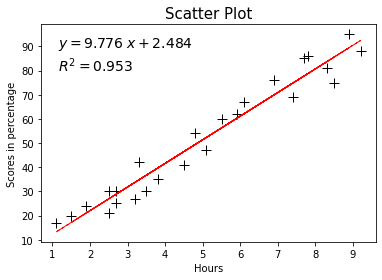

In [40]:
from sklearn.metrics import r2_score

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.xlabel("Hours")
plt.ylabel("Scores in percentage")
plt.title("Scatter Plot",fontsize=15)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

In [49]:
x_train = x.values.reshape(-1, 1)
y_train = y.values.reshape(-1, 1)

In [37]:
# From the above observation, Hours and Scores are positively correlated with a correlation of 0.953.

In [42]:
# Fitting a simple regression model.
from sklearn.linear_model import LinearRegression

In [50]:
linr_model = LinearRegression().fit(x_train,y_train)
linr_model

LinearRegression()

In [55]:
# Model Fitting Results.
linr_model.coef_

array([[9.77580339]])

In [56]:
linr_model.intercept_

array([2.48367341])

In [57]:
# Scores = 9.776*Hours + 2.484

In [59]:
#Making Predictions based on the coefficient and intercept

linr_model.predict(df1[["Hours"]])

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

#### Here, we just called the predict() method from linear_model on Hours variable from the dataset, and then the system will predict the Scores values based on the equation for each Hour value. The result is an array as shown above.
